In [1]:

# import the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#lets read the data
data = pd.read_csv("train.csv")

In [3]:
#lets look at the first few rows
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)


In [6]:
# transposing and creating testing and validation sets
data_dev =data[0:1000].T
X_dev = data_dev[1:n] 
X_dev = X_dev /255
Y_dev = data_dev[0]

data_train = data[1000:m].T
X_train = data_train[1:n]
X_train = X_train /255
Y_train = data_train[0]

In [7]:
#initializing the parameters: weights and biases
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2= np.random.rand(10,10) - 0.5
    b2= np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2


In [8]:
def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    exp_Z = np.exp(Z)
    return exp_Z / np.sum(exp_Z, axis=0)




In [9]:
def forward_prop (W1,b1,W2,b2,X):
    Z1 = W1.dot(X)+b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y) :
    one_hot_Y = np.zeros((Y.size,Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z) :
    return Z > 0
                         
def back_prop (Z1,A1,Z2,A2,W1,W2,X,Y) :
    m= Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y)
    dW2 = 1 / m * dZ2 .dot(A1.T)
    db2 = 1 / m * np.sum(dZ2,1) 
    dZ1 = W2.T.dot(dZ2) *deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1 .dot(X.T)
    db1 = 1 / m * np.sum(dZ1,1)  
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1-alpha * dW1
    b1 = b1-alpha * np.reshape(db1,(10,1))
    W2 = W2 - alpha * dW2
    b2 = b2- alpha *np.reshape(db2,(10,1))
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
                         
def gradient_descent (X,Y,iterations,alpha) :
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1, b1, W2, b2

In [10]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train, 300,0.10)

Iteration:  0
[7 3 3 ... 8 4 3] [2 2 8 ... 3 1 9]
Accuracy:  0.10590243902439024
Iteration:  50
[6 3 1 ... 3 1 7] [2 2 8 ... 3 1 9]
Accuracy:  0.5557804878048781
Iteration:  100
[2 3 1 ... 3 1 9] [2 2 8 ... 3 1 9]
Accuracy:  0.7009024390243902
Iteration:  150
[2 3 1 ... 3 1 9] [2 2 8 ... 3 1 9]
Accuracy:  0.7675609756097561
Iteration:  200
[2 3 1 ... 3 1 9] [2 2 8 ... 3 1 9]
Accuracy:  0.7978536585365854
Iteration:  250
[2 3 1 ... 3 1 9] [2 2 8 ... 3 1 9]
Accuracy:  0.8276341463414634


In [15]:
def make_predictions(X,W1,b1,W2,b2):
    Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index,W1,b1,W2,b2):
    current_image =X_train[:,index,None]
    prediction = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print("Prediction:",prediction)
    print("Label:",label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()

Prediction: [8]
Label: 8


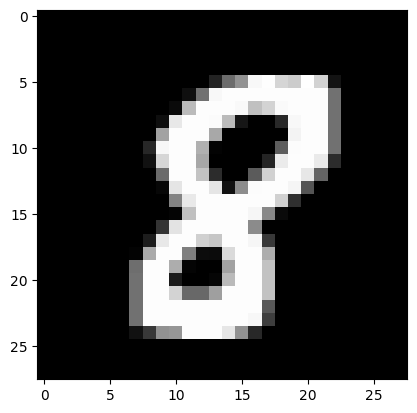

In [17]:
test_prediction(10,W1,b1,W2,b2)

__References__

The credits to this project goes to Samson Zhang in https://www.youtube.com/watch?v=w8yWXqWQYmU&t=34s&ab_channel=SamsonZhang.